# Thyroid Diseases

Kajetan jankowski

## 01. Wstęp

Wybrałem baze danych posiadająca informacje o chorobach tarczycy. Baza danych posiada 8795 wierszu oraz 28 kulumn, zawiera mniedzy innymi informacje o wieku, płóci,czy pacjęt bierze leki, oraz kolumne "target" - podająca wynik. Jest 8 diagnoz : 
       
    negative
        
    hypothyroid conditions
    
    binding protein
    
    general health
    
    replacement therapy
    
    antithyroid treatment
    
    miscellaneous


## 02. Bazy danych 

Stworzyłem 2 bazy danych, gdzie pierwsza posiada 69% zdrowych - "Negative" do 31% chorych i posiada ona 7720 wierszy oraz 29 kolumn. Natomiast druga baza danych posiada mniej wierszy i jest to 4886 oraz stosunek 50% zdrowych (negative) - 50% chorych 

## 03. Podziały

In [4]:
all_inputs = data.drop('target',axis=1).values
all_classes = data['target'].values

all_inputs2 = data2.drop('target', axis=1).values
all_classes2 = data2['target'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.6, random_state=278892)
(train_inputs2, test_inputs2, train_classes2, test_classes2) = train_test_split(all_inputs2, all_classes2, train_size=0.6, random_state=278892)


W kolumnie 'target' znajdują się diagnozy i służa one jako class/label. Dziele moje dane na zestaw treningowy(60%) oraz testywy(40%)

## 04. Klasyfikacja

### 01. DecisionTreeClassifier

Dla pierwszej bazy danych stworzyłem taki model który wskazuje 93.7 % 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from Data import data, data2


In [8]:

dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)
print(dtc.score(test_inputs, test_classes))

0.9371761658031088


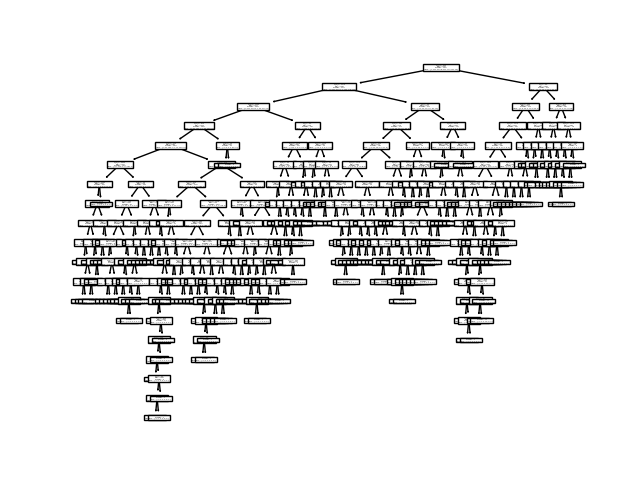

Wizualne przedstawienie drzewa 

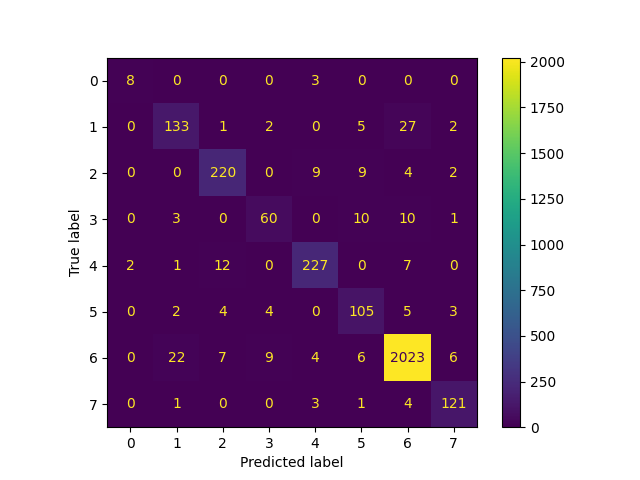

Macierz błędy

Model dla bazy danych 2 

In [6]:
dtc = DecisionTreeClassifier()
dtc.fit(train_inputs2, train_classes2)
dtc.score(test_inputs2, test_classes2)
print(dtc.score(test_inputs2, test_classes2))

0.921227621483376


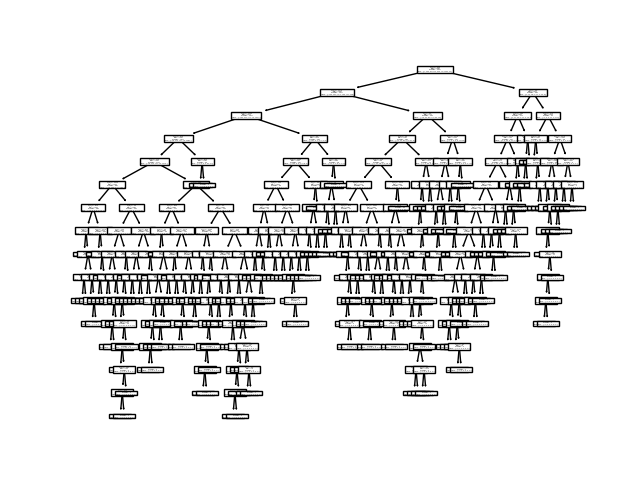
Wizualne przedstawienie drzewa



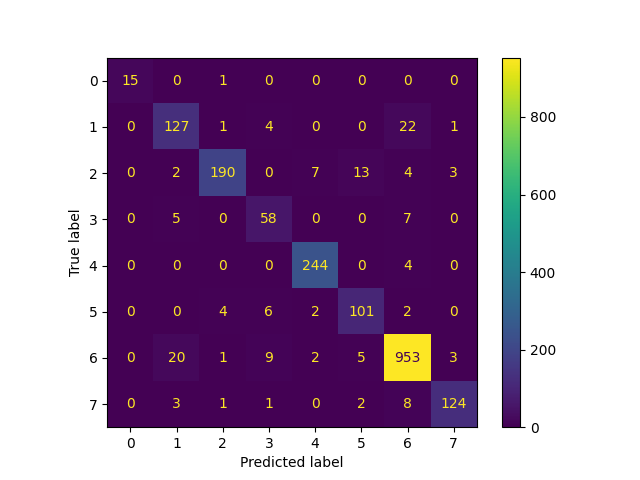

macierz błędu

Przeprowadziłem jeszcze w wersji mniejszez przyciętymi gałęziami - max_depth=5

0.8516839378238342


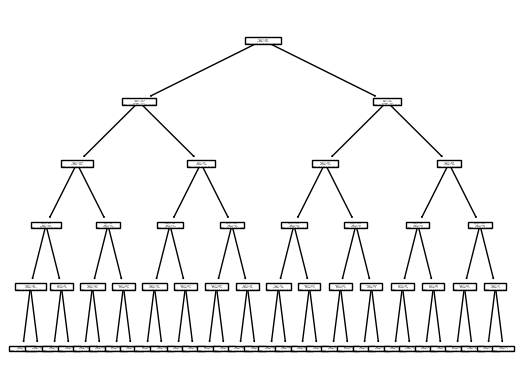

In [16]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)
print(dtc.score(test_inputs, test_classes))
tree.plot_tree(dtc)
plt.show()

0.8061381074168797


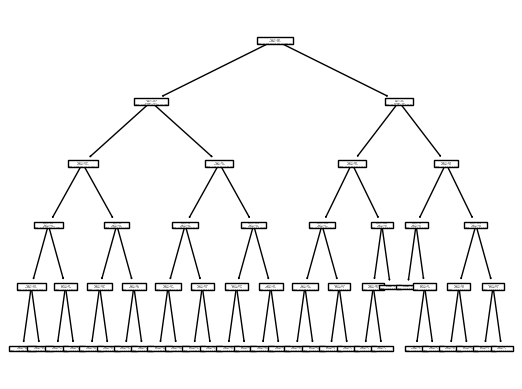

In [17]:

dtc2 = DecisionTreeClassifier(max_depth=5)
dtc2.fit(train_inputs2, train_classes2)
dtc2.score(test_inputs2, test_classes2)
print(dtc2.score(test_inputs2, test_classes2))
tree.plot_tree(dtc2)
plt.show()

 #### DecisionTreeClassifier - Analiza

Dla moich baz danych wyniki są bardzo podobne oby dwa modele osiągneły wyniki około 94% skuteczności. Jeśli chodzi o zmniejszone drzewo skuteczność oczywiście zmalała data-85% data2-80%

### 02. NaiveBayes

Dla klasyfikatora Naive Bayes zakładam, że moje dane nie są dobrym wyborem i skuteczność nie bedzie duża, gdyż ten algorytm zakłada że dane są niezależne. W moim przypadku są bardzo zalezne

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

model = GaussianNB()

model.fit(train_inputs, train_classes)

y_pred = model.predict(test_inputs)
accuray = accuracy_score(y_pred, test_classes)
f1 = f1_score(y_pred, test_classes, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.1133419689119171
F1 Score: 0.1323108433723468


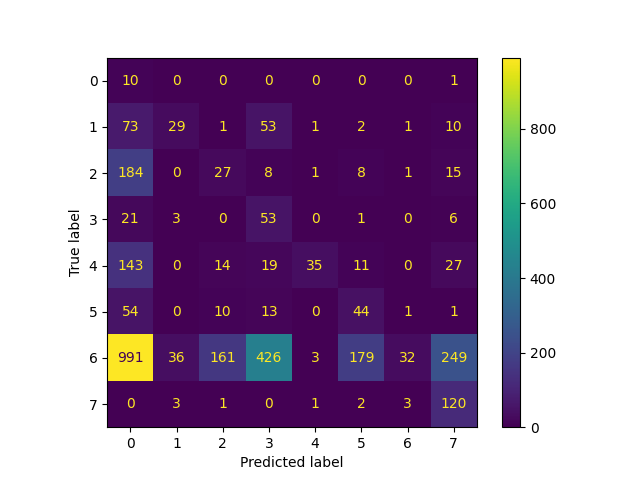
Macierz błędu

In [24]:
model = GaussianNB()

model.fit(train_inputs2, train_classes2)

y_pred = model.predict(test_inputs2)
accuray = accuracy_score(y_pred, test_classes2)
f1 = f1_score(y_pred, test_classes2, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.27263427109974425
F1 Score: 0.2918264598342539


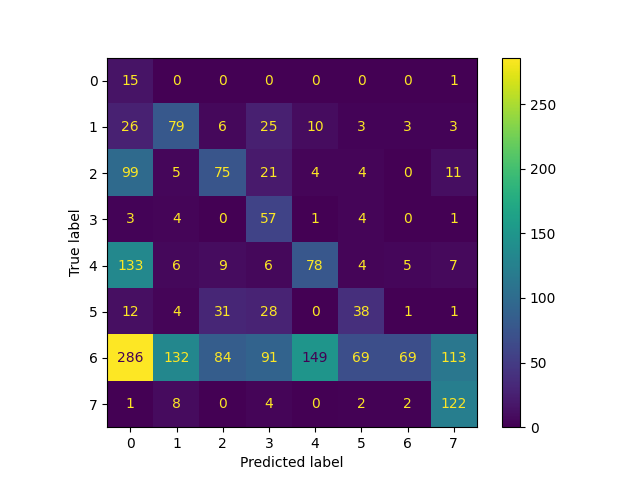
macierz blędu

#### NaiveBayes-Analiza

Tak jak napisałem wcześniej ten klasyfikaor nie jest dobry dla moich danych i daje marne wyniki dla obydwóch baz danych lecz dla data2 daje troche lepsze 

### 03. K-Najbliższych Sąsiadów

Przyjołem 3,5 oraz 11 jako "k" i dla każdego z nich odpalilem algorytm

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np


k_range=[3,5,11]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_inputs,train_classes)
    y_pred=knn.predict(test_inputs)
    print(i , " - "  ,metrics.accuracy_score(test_classes,y_pred)*100)
 
   

3  -  75.42098445595855
5  -  77.04015544041451
11  -  76.97538860103627


Macierze błędu w kolejności wyników 3 , 5 ,11 
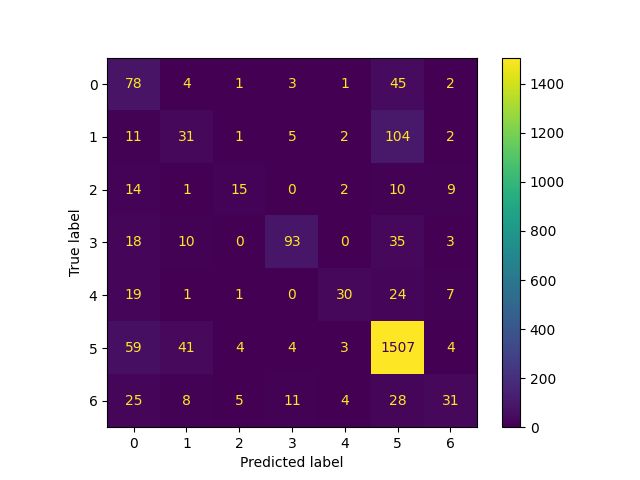




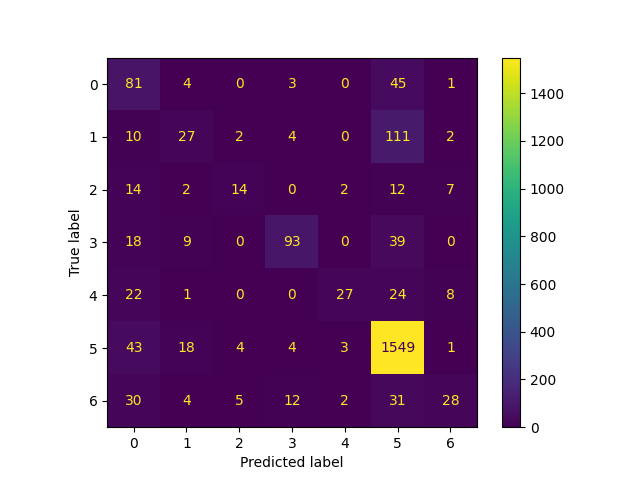

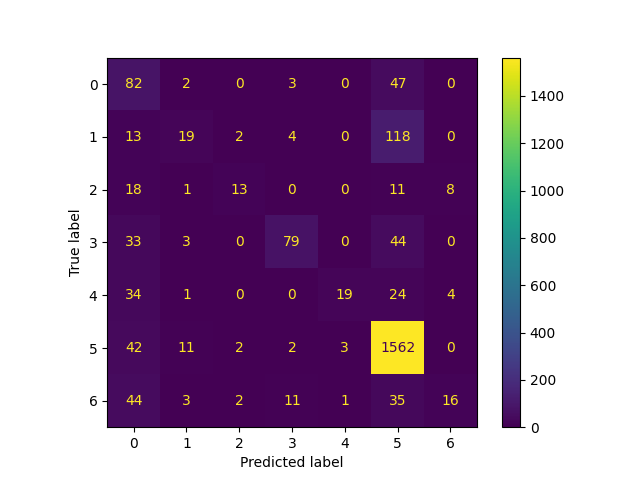

In [37]:
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_inputs2,train_classes2)
    y_pred=knn.predict(test_inputs2)
    print(i , " - "  ,metrics.accuracy_score(test_classes2,y_pred)*100)

3  -  65.67774936061382
5  -  67.97953964194373
11  -  67.05882352941175


Macierze błędu w kolejności wyników 3 , 5 ,11 
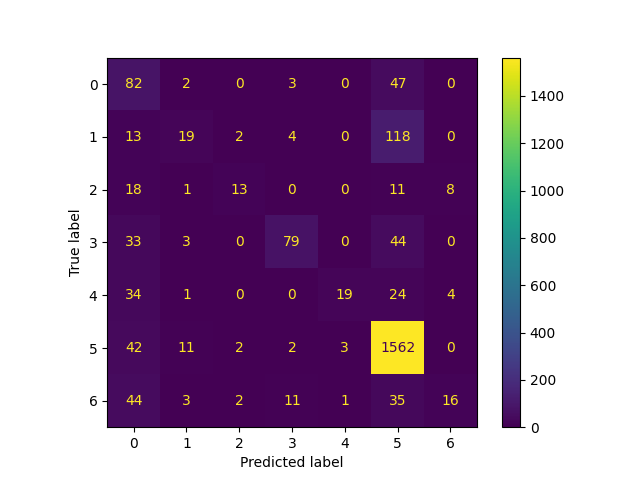

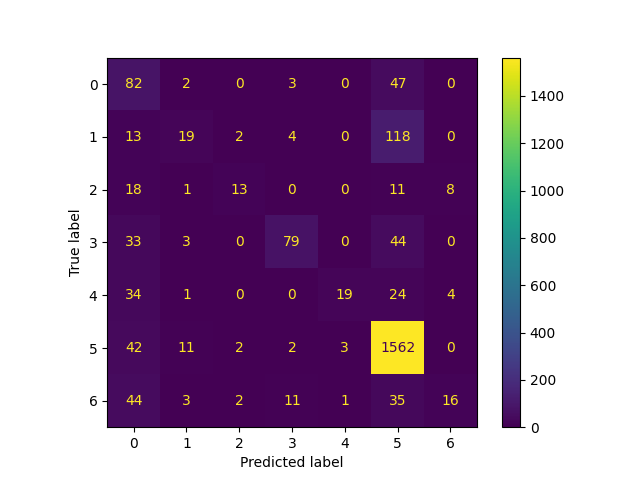

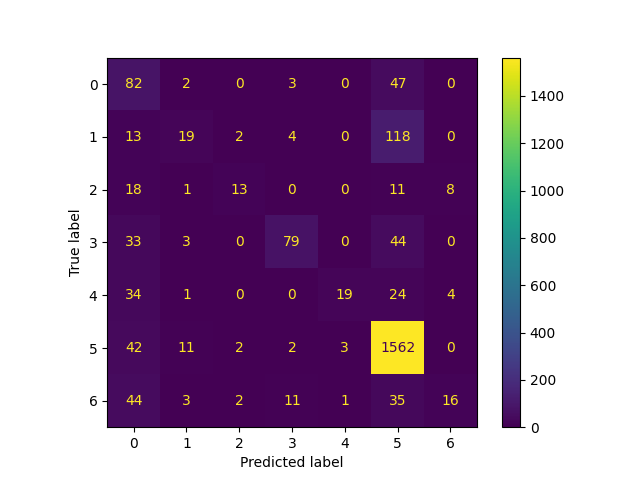

#### K-Najbliższych Sąsiadów- Analiza

Widzimy, że dla moich danych - data czyli danych z wieksza różnicą chorych a zdrowych , skuteczność jest wieksza od data2 o około 10%

### 04. Sieć neuronowa 

Przetestowałem kilka 'optimizer' - adam oraz Ftrl. Jako, że moja baza danych ma kilka wyników dokładnie 8 to jako 'Loss' przyjąłem 'sparse_categorical_crossentropy'. Także przetestowałęm dla innych funkcji aktywacji sigmoid-oraz softplus. Dla różnych aktywacji dopasowałem takżę , epoki oraz batch-size.





In [ ]:

from sklearn import preprocessing
from sklearn.discriminant_analysis import StandardScaler
from keras.models import Sequential
from keras.layers import Dense , Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import numpy as np
from matplotlib import pyplot as plt




from Data import data, data2
le = preprocessing.LabelEncoder()

data['target'] = le.fit_transform(data['target'])
data2['target'] = le.fit_transform(data2['target'])

all_inputs = data.drop('target',axis=1).values
all_classes = data['target'].values

all_inputs2 = data2.drop('target', axis=1).values

all_classes2 = data2['target'].values


(train_data, test_data, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.4, random_state=278892)
(train_data2, test_data2, train_classes2, test_classes2) = train_test_split(all_inputs2, all_classes2, train_size=0.6, random_state=278892)

scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


scaler2 = StandardScaler()
scaler2.fit(train_data2)
train_data2 = scaler2.transform(train_data2)
test_data2 = scaler2.transform(test_data2)



#### Mała topografia 


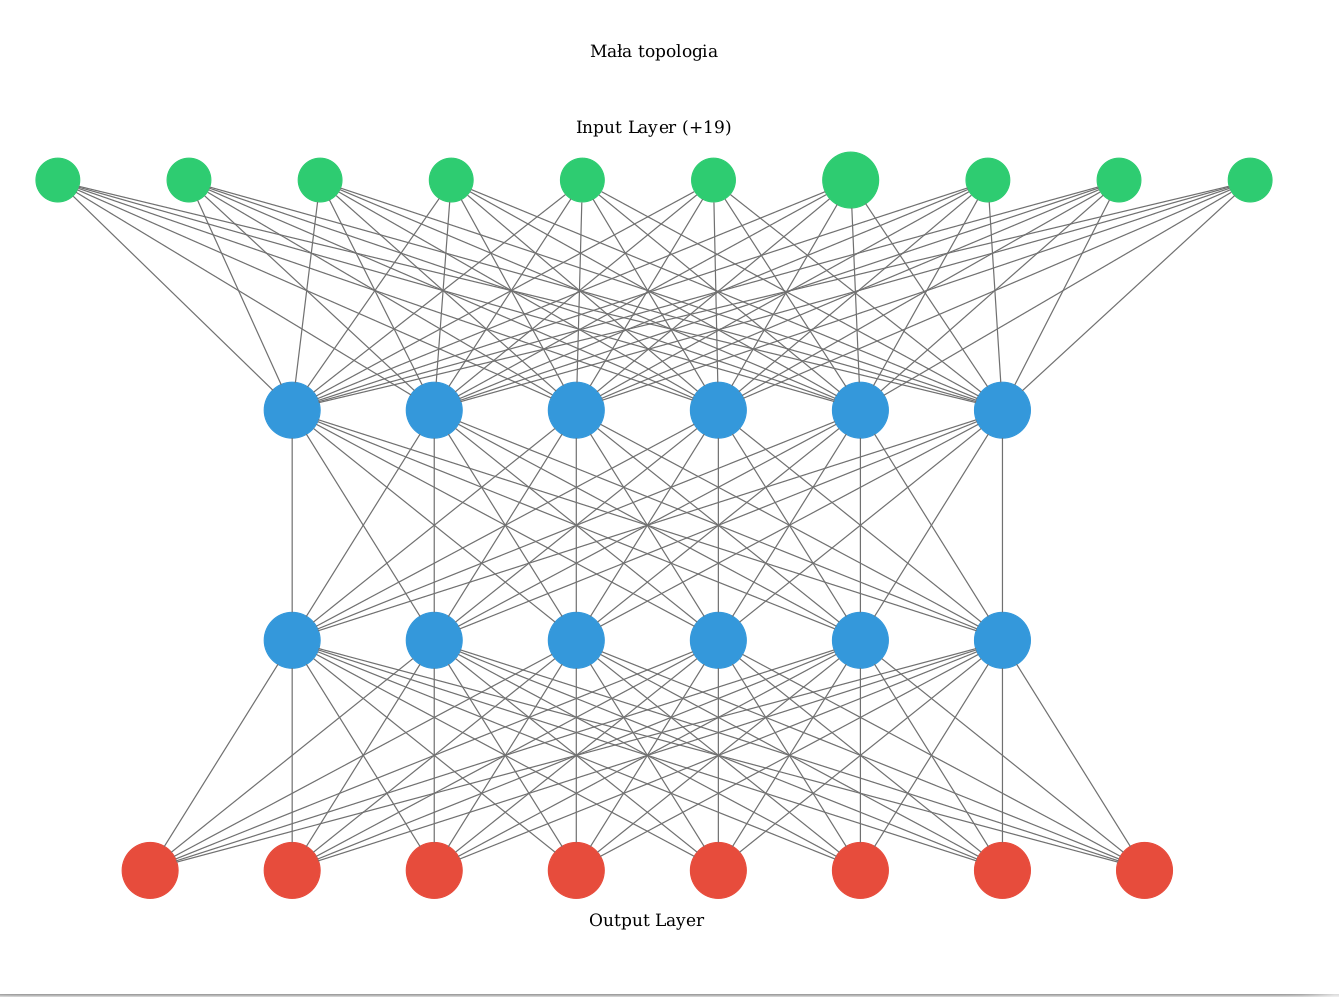

### ADAM


145/145 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.8279
Accuracy: 82.79
145/145 [==============================] - 0s 1ms/step


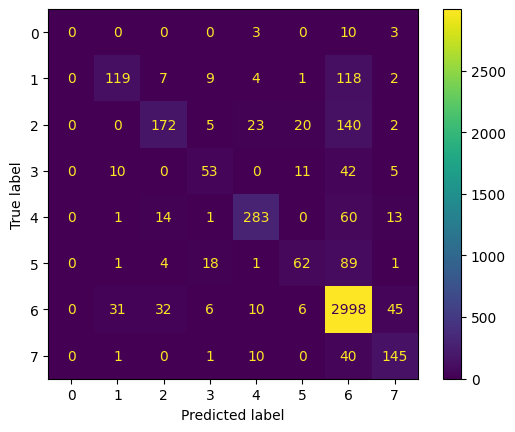

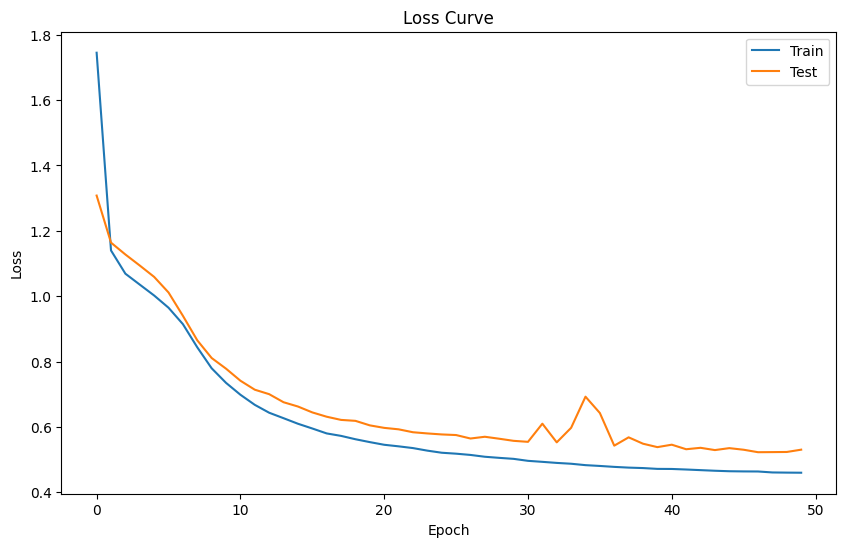

In [72]:

model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history= model.fit(train_data, train_classes, epochs=50, batch_size=8,verbose=0, validation_data=(test_data, test_classes))
_, accuracy = model.evaluate(test_data, test_classes)
print('Accuracy: %.2f' % (accuracy*100))
y_pred_labels = np.argmax(model.predict(test_data), axis=1)
cm = confusion_matrix(test_classes, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.legend()
plt.show()





data2:  

62/62 [==============================] - 0s 1ms/step - loss: 0.7086 - accuracy: 0.7862
Accuracy: 78.62
62/62 [==============================] - 0s 1ms/step


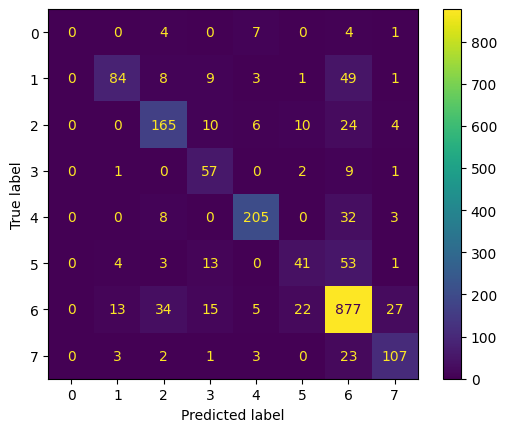

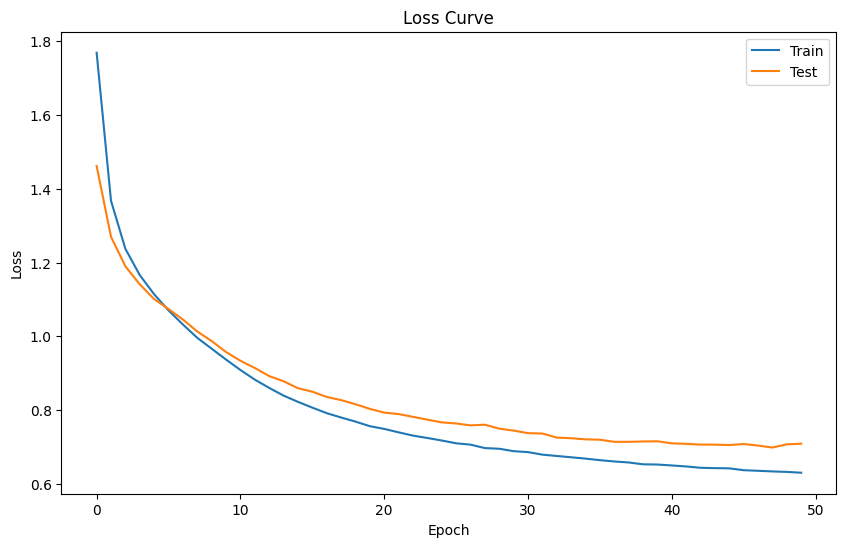

In [73]:

model2 = Sequential()
model2.add(Dense(6, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(8, activation='sigmoid'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_data2, train_classes2, epochs=50, batch_size=8,verbose=0, validation_data=(test_data2, test_classes2))
_, accuracy = model2.evaluate(test_data2, test_classes2)
print('Accuracy: %.2f' % (accuracy*100))

ann_viz(model2, title="Mała topologia")


y_pred_labels = np.argmax(model2.predict(test_data2), axis=1)
cm = confusion_matrix(test_classes2, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Ftrl

145/145 [==============================] - 0s 927us/step - loss: 1.5249 - accuracy: 0.6753
Accuracy: 67.53
145/145 [==============================] - 0s 713us/step


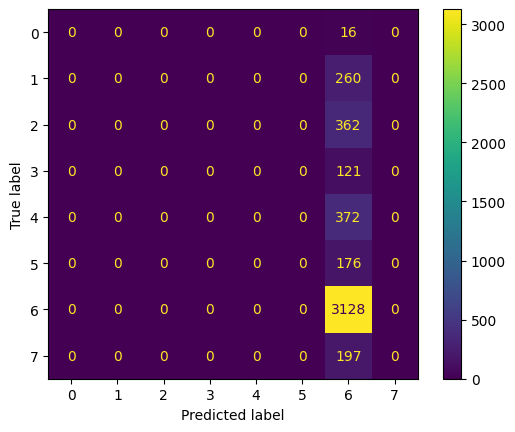

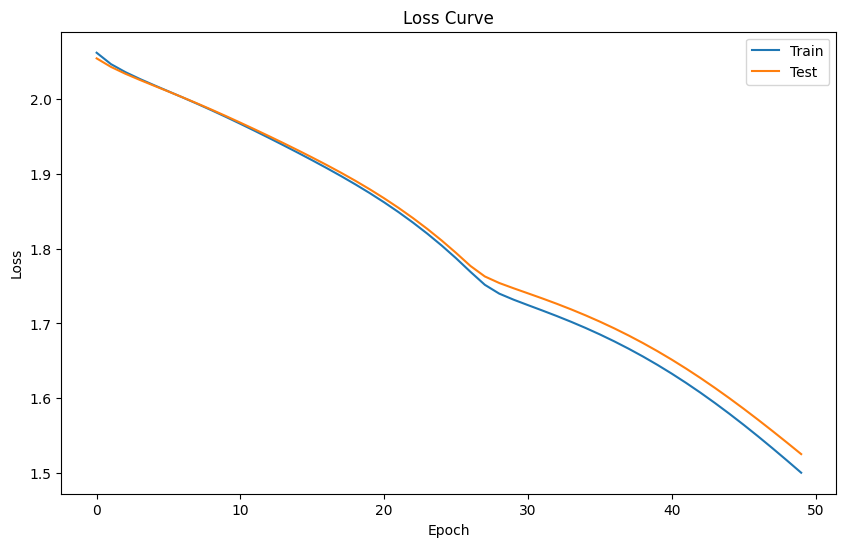

In [117]:

model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(8, activation='softplus'))
model.compile(optimizer='Ftrl', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history= model.fit(train_data, train_classes, epochs=50, batch_size=8,verbose=0, validation_data=(test_data, test_classes))
_, accuracy = model.evaluate(test_data, test_classes)
print('Accuracy: %.2f' % (accuracy*100))
y_pred_labels = np.argmax(model.predict(test_data), axis=1)
cm = confusion_matrix(test_classes, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.legend()
plt.show()


Data2:


31/31 [==============================] - 0s 1ms/step - loss: 1.5493 - accuracy: 0.4888
Accuracy: 48.88
31/31 [==============================] - 0s 803us/step


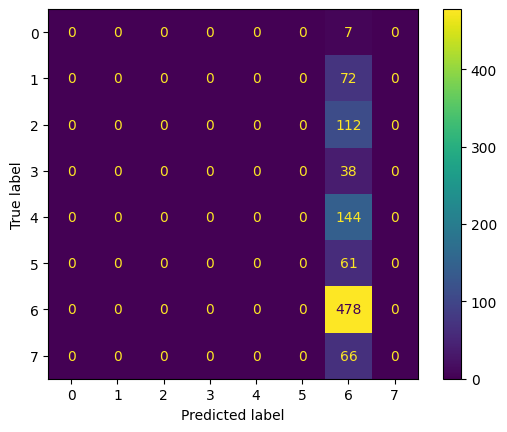

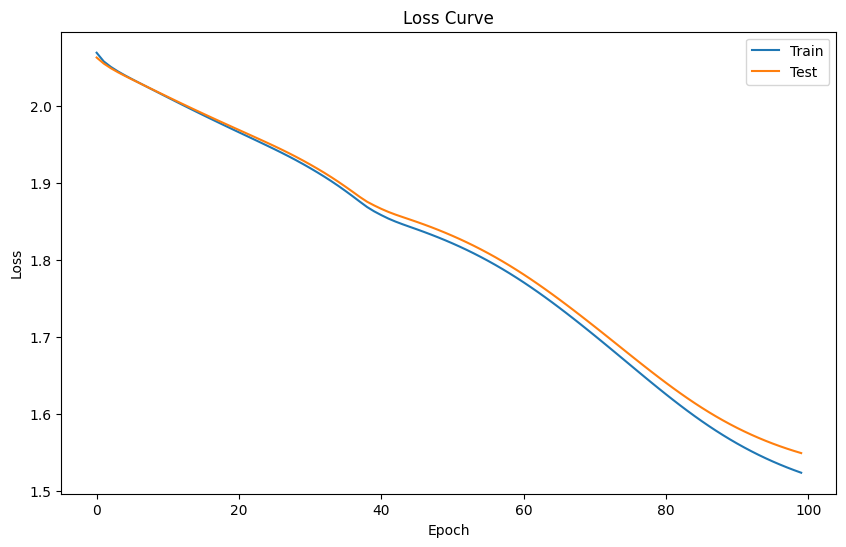

In [118]:

model2 = Sequential()
model2.add(Dense(6, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(8, activation='softplus'))
model2.compile(optimizer='Ftrl', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_data2, train_classes2, epochs=100, batch_size=8 ,verbose=0, validation_data=(test_data2, test_classes2))
_, accuracy = model2.evaluate(test_data2, test_classes2)
print('Accuracy: %.2f' % (accuracy*100))

# ann_viz(model2, title="Mała topologia")


y_pred_labels = np.argmax(model2.predict(test_data2), axis=1)
cm = confusion_matrix(test_classes2, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

###  Duża topologia 

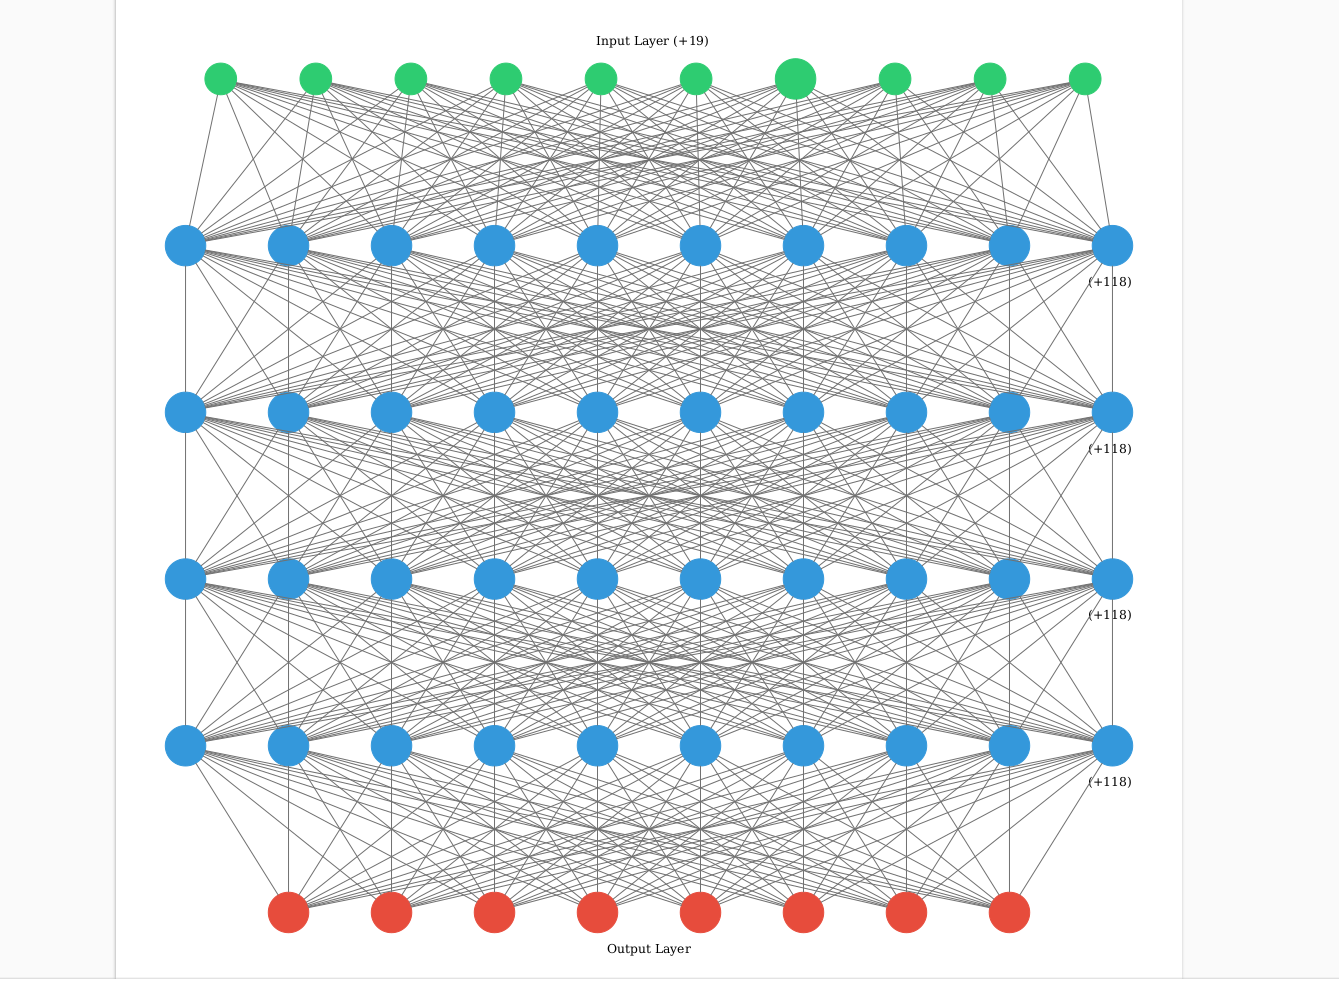

### Adam

169/169 [==============================] - 0s 1ms/step - loss: 0.9162 - accuracy: 0.8653
Accuracy: 86.53
169/169 [==============================] - 0s 895us/step


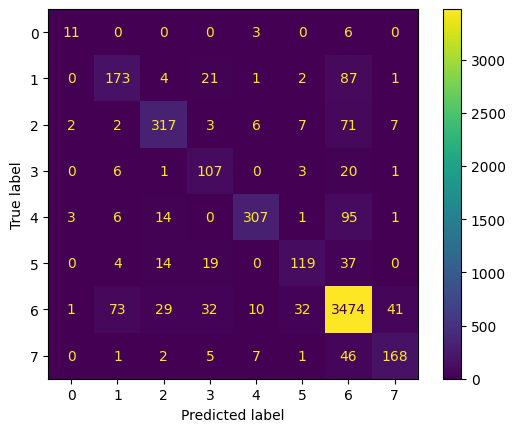

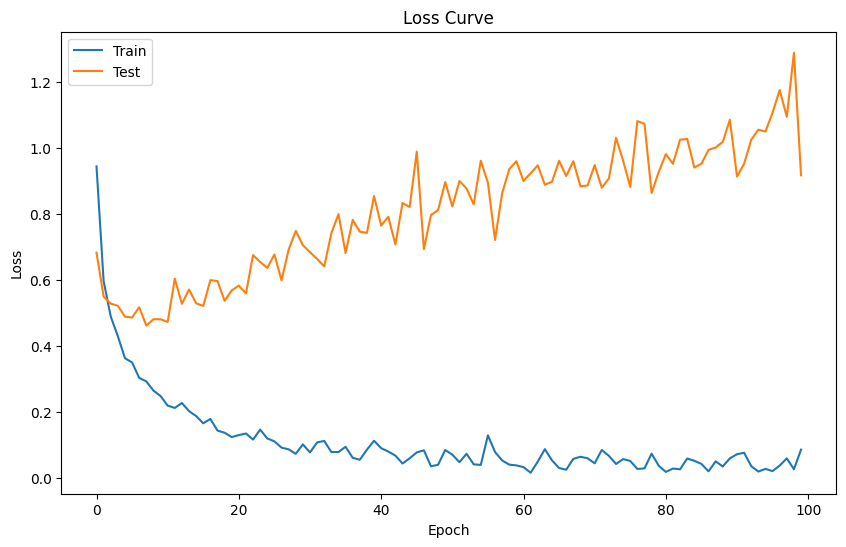

In [122]:
(train_data, test_data, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.3, random_state=278892)


scaler2 = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history= model.fit(train_data, train_classes, epochs=100, batch_size=8,verbose=0, validation_data=(test_data, test_classes))
_, accuracy = model.evaluate(test_data, test_classes)
print('Accuracy: %.2f' % (accuracy*100))
y_pred_labels = np.argmax(model.predict(test_data), axis=1)
cm = confusion_matrix(test_classes, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.legend()
plt.show()

107/107 [==============================] - 0s 1ms/step - loss: 2.3528 - accuracy: 0.8100
Accuracy: 81.00
107/107 [==============================] - 0s 920us/step


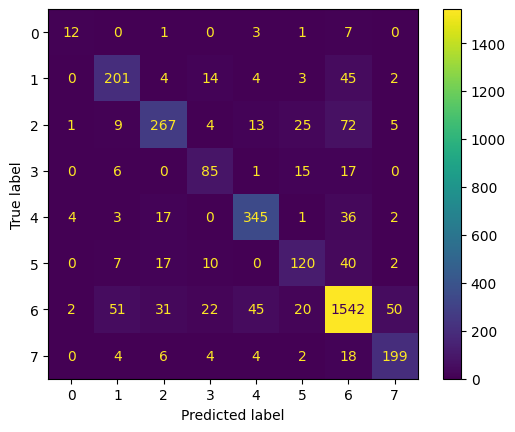

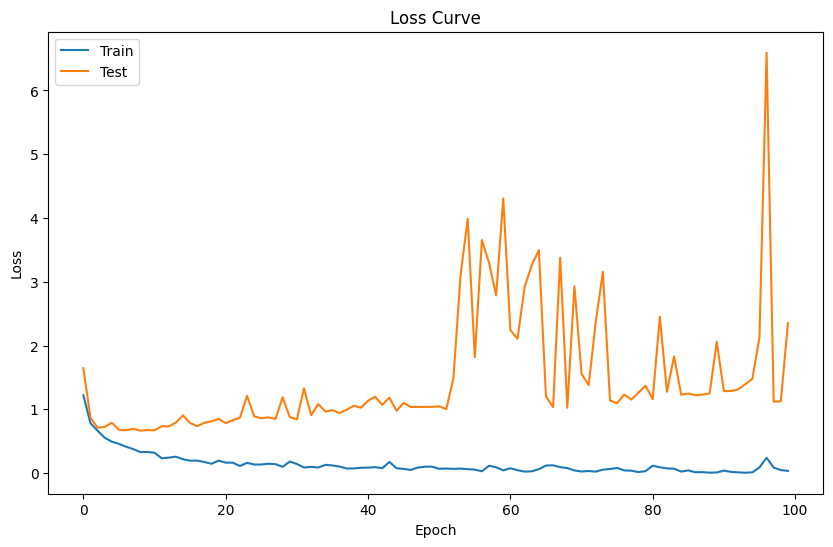

In [121]:
(train_data2, test_data2, train_classes2, test_classes2) = train_test_split(all_inputs2, all_classes2, train_size=0.3, random_state=278892)


scaler2 = StandardScaler()
scaler2.fit(train_data2)
train_data2 = scaler2.transform(train_data2)
test_data2 = scaler2.transform(test_data2)

model2 = Sequential()
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(8, activation='sigmoid'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_data2, train_classes2, epochs=100, batch_size=8 ,verbose=0, validation_data=(test_data2, test_classes2))
_, accuracy = model2.evaluate(test_data2, test_classes2)
print('Accuracy: %.2f' % (accuracy*100))

# ann_viz(model2, title="Mała topologia")


y_pred_labels = np.argmax(model2.predict(test_data2), axis=1)
cm = confusion_matrix(test_classes2, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Ftrl

145/145 [==============================] - 0s 1ms/step - loss: 1.2079 - accuracy: 0.6753
Accuracy: 67.53
145/145 [==============================] - 0s 1ms/step


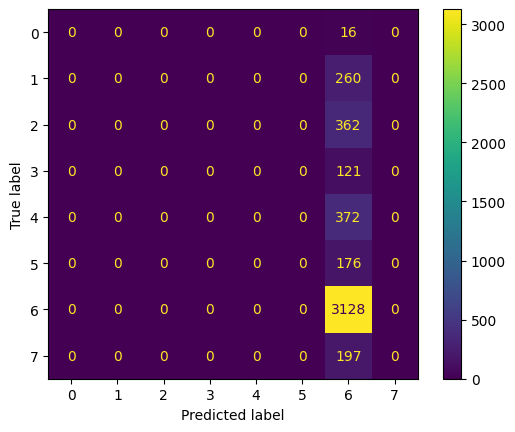

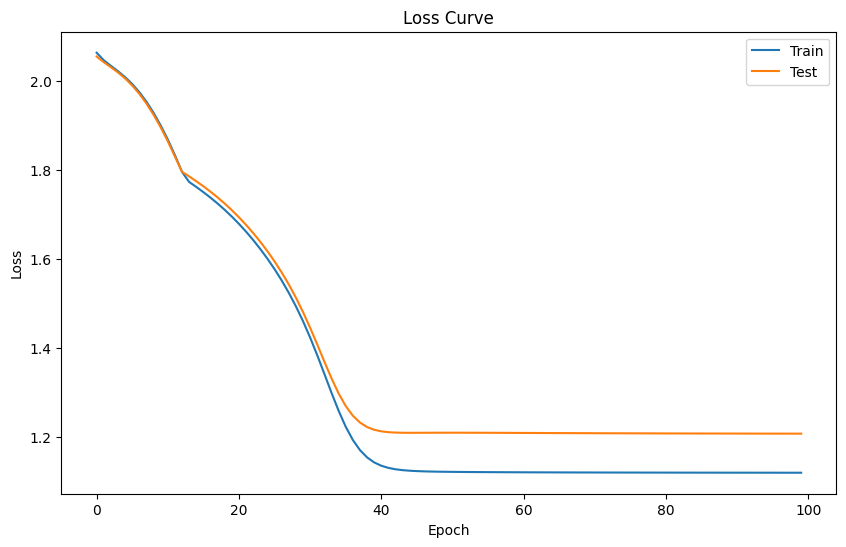

In [112]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softplus'))
model.compile(optimizer='Ftrl', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history= model.fit(train_data, train_classes, epochs=100, batch_size=8,verbose=0, validation_data=(test_data, test_classes))
_, accuracy = model.evaluate(test_data, test_classes)
print('Accuracy: %.2f' % (accuracy*100))
y_pred_labels = np.argmax(model.predict(test_data), axis=1)
cm = confusion_matrix(test_classes, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch') 
plt.ylabel('Loss')
plt.legend()
plt.show()


data2:

31/31 [==============================] - 0s 1ms/step - loss: 1.5951 - accuracy: 0.4888
Accuracy: 48.88
31/31 [==============================] - 0s 1ms/step


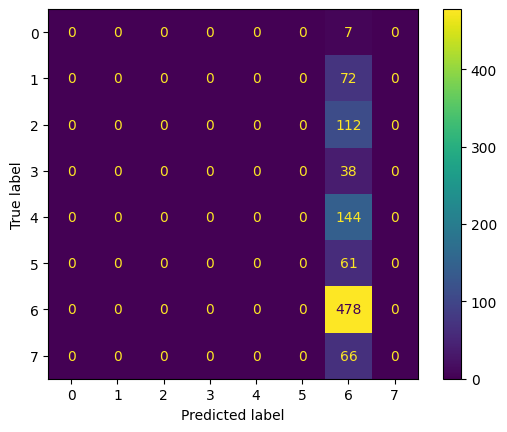

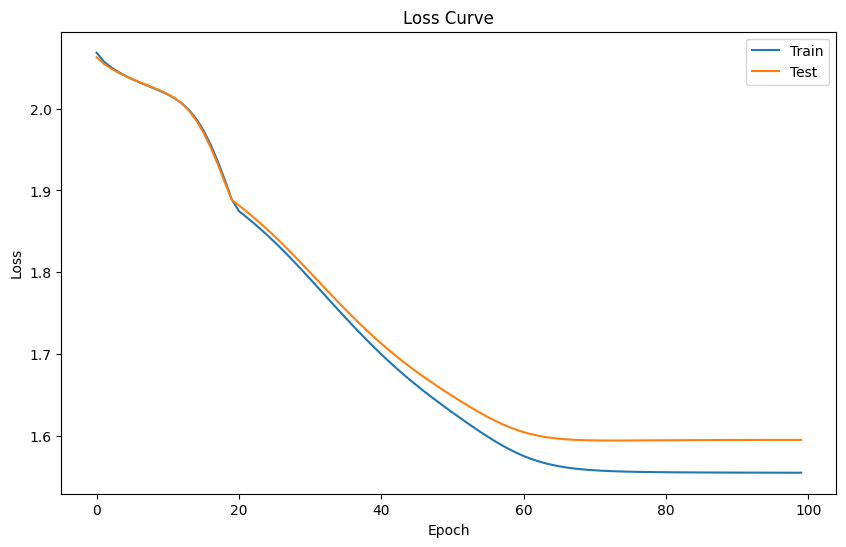

In [111]:
model2 = Sequential()
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(8, activation='softplus'))
model2.compile(optimizer='Ftrl', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_data2, train_classes2, epochs=100, batch_size=8 ,verbose=0, validation_data=(test_data2, test_classes2))
_, accuracy = model2.evaluate(test_data2, test_classes2)
print('Accuracy: %.2f' % (accuracy*100))

# ann_viz(model2, title="Mała topologia")


y_pred_labels = np.argmax(model2.predict(test_data2), axis=1)
cm = confusion_matrix(test_classes2, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Analiza wyników

Starałem sie dobrać tak wyniki aby krzywa loss tak na końcu juz sie troche przetrenowywała. zebrane wyniki przedstawione są poniżej w tabelce.

                                                        data
|topologia| optimazer| skuteczność  |funkcja aktywująca |train/test |
|:-:|:-:|:-:| :-:|:-:|
|mała 2x6| Adam | 82.79  | sigmoid |0,6/0,4 |
|mała 2x6| Ftrl | 67.53 |  signplus  |0,6/0,4 |
|duża 4x128| Adam | 86.53 |  sigmoid  |0,3/0,7 |
|duża 4x128 | Ftrl  | 67.53 |signplus |0,6/0,4 |

                                                        data2
|topologia| optimazer| skuteczność  |funkcja aktywująca |train/test |
|:-:|:-:|:-:| :-:| :-:|
|mała 2x6| Adam |78.62 | sigmoid |0,6/0,4 
|mała 2x6| Ftrl | 48.88  |  signplus  |0,6/0,4 |
|duża 4x128| Adam | 81.00 |  sigmoid  |0,3/0,7 |
|duża 4x128 | Ftrl  |  48.88 |signplus |0,6/0,4 |


Jeśli chodzi o to który optimazer jest lepszy to wydaje mi się, że lepiej poradział sbie podstawowy "adam" od "Ftrl". Można zaobserwować, żę wyniki z ftrl mają pewne podobieństwo do % zdrowych w bazach danych. 

W przypadku dużej topologi sieci   pomimo obniżenia części treningowej i tym samym wiekszenia testowej wystepuje przeuczenie, sieć za dobrze opanowała dane, dlatego też skuteczność wzrosła.

## 05. Podsumowanie

Najwieksza skuteczność uzyskał klasyfikator "Drzewa" , najgorszą natomiast "Naiwny bayes", co można było przyposzczać. Na sieciach skupiłem się najbardziej i próbowałem różnych kombinacji, wyniki wyszły dobre lecz sądziłem, że wyjdą lepsze i dokładniejsze. 